# PYBER ANALYSIS


**The analysis gives insights about the demographics and revenue-makers for the Pyber divided in three regions , Urban , suburban and rural comprising of a total of 120 cities ,there are a total of 66 Urban , 36 Suburban , 18 Rural cities in the data .

**The urban areas have the the highest share of total number of rides per city with a huge 68.4% of total rides by city type along with 80.9% of total drivers by city type belonging to the urban areas . The urban areas contribute to the Total fares by a 62.7% which is the highest followed by suburban at 30.5% and the rural areas come third at 6.8% .
This clearly affirms the Urban areas being the biggest demographic of the company's services with the maximum number of rides , total number of drivers and the biggest revenue generator . Interestingly the urban areas have a much lower average fare between 20 to 28 USD compared to rural and suburban average fares .The highest average fare belongs to rural cities at 44 USD whereas the lowest average fare belongs to Urban cities at 20 USD . The suburban areas have an average fare between 24 and 36 USD. 

**This trend is consistent when analyzing the total percentage of drivers in suburban areas being 16.5% and in the rural areas it is 2.6%. Similarly the total rides per city have the suburban areas at 26.3% and rural at 5.3% .

* The city with the highest average fare is "Taylorhaven" at 42.26 USD and lies within the rural area.
* The city with the lowest average fare is "South Latoya" at 20 USD and lies within the urban area.
* The city with the maximum number of rides is "West Angela" at 39 rides and lies in the urban area with an average     fare of 29 USD and the minimum number of rides were given in the city "South Saramouth" at 6 rides and lies within     the rural area and has an average fare of 36 USD.


In [238]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Files to Load 
city_data = "./Resources/city_data.csv"
ride_data = "./Resources/ride_data.csv"


# Read the City and Ride Data
city_data = pd.read_csv(city_data)
ride_data = pd.read_csv(ride_data)


# Combine the data into a single dataset
combined_df = pd.merge(ride_data, city_data, on="city", how ="left", indicator=True)

combined_df.head(10)
#2375 rows × 7 columns

,city,date,fare,ride_id,driver_count,type,_merge
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban,both
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban,both
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban,both
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban,both
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban,both
5,South Latoya,2018-03-11 12:26:48,9.52,1994999424437,10,Urban,both
6,New Paulville,2018-02-27 11:17:56,43.25,793208410091,44,Urban,both
7,Simpsonburgh,2018-04-26 00:43:24,35.98,111953927754,21,Urban,both
8,South Karenland,2018-01-08 03:28:48,35.09,7995623208694,4,Urban,both
9,North Jasmine,2018-03-09 06:26:29,42.81,5327642267789,33,Urban,both


In [239]:
#Take a count and check for any NaN values

combined_df.count()
combined_df = combined_df.dropna(how = "any")
combined_df.count()
#Row nos remain 2375 before and after dropping any NaN values so there are none NaN found.

city            2375
date            2375
fare            2375
ride_id         2375
driver_count    2375
type            2375
_merge          2375
dtype: int64

In [240]:
#BUBBLE PLOT OF RIDE SHARING DATA

# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure

In [271]:
#check how many unique cities are there

total_cities = combined_df["city"].unique()
print(len(total_cities)) # 120 cities

# Group the data acc to cities
city_grouped = combined_df.groupby(["city"])

#Average Fare ($) Per City( y axis)
avg_fare = city_grouped["fare"].mean()

city_grouped.count().head()

120


,date,fare,ride_id,driver_count,type,_merge
city,,,,,,
Amandaburgh,18,18,18,18,18,18
Barajasview,22,22,22,22,22,22
Barronchester,16,16,16,16,16,16
Bethanyland,18,18,18,18,18,18
Bradshawfurt,10,10,10,10,10,10


In [242]:
#Total Number of Rides Per City( x axis )
total_rides = combined_df.groupby(["city"])["ride_id"].count()

total_rides.head()

city
Amandaburgh      18
Barajasview      22
Barronchester    16
Bethanyland      18
Bradshawfurt     10
Name: ride_id, dtype: int64

In [243]:
#Total Number of Drivers Per City
total_drivers = combined_df.groupby(["city"])["driver_count"].mean()

total_drivers.head()

city
Amandaburgh      12
Barajasview      26
Barronchester    11
Bethanyland      22
Bradshawfurt      7
Name: driver_count, dtype: int64

In [244]:
city_types = city_data.set_index(["city"])["type"]
city_types.value_counts()


Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

In [272]:
combined_df2 = pd.DataFrame({"Average Fare per City":avg_fare,
                "Number of Rides": total_rides,
                "Number of Drivers": total_drivers,
                "City Type": city_types
})
combined_df2.head()

,Average Fare per City,Number of Rides,Number of Drivers,City Type
Amandaburgh,24.641667,NaN,NaN,Urban
Barajasview,25.332273,NaN,NaN,Urban
Barronchester,36.422500,NaN,NaN,Suburban
Bethanyland,32.956111,NaN,NaN,Suburban
Bradshawfurt,40.064000,NaN,NaN,Rural


In [267]:
#Filtering on the basis of city type and creating Urban , Suburban and Rural dataframes.

urban_df = combined_df2.loc[combined_df2["City Type"]== "Urban"]

suburban_df = combined_df2.loc[combined_df2["City Type"]== "Suburban"]

rural_df = combined_df2.loc[combined_df2["City Type"]== "Rural"]

urban_df.head()

,Average Fare per City,Number of Rides,Number of Drivers,City Type
Amandaburgh,24.641667,NaN,NaN,Urban
Barajasview,25.332273,NaN,NaN,Urban
Carriemouth,28.314444,NaN,NaN,Urban
Christopherfurt,24.501852,NaN,NaN,Urban
Deanville,25.842632,NaN,NaN,Urban


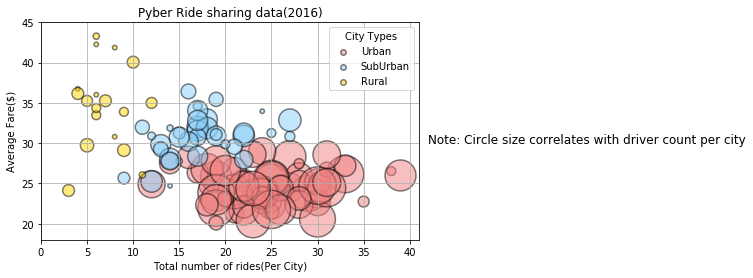

In [247]:
#Create a Scatterplot


plt.scatter(urban_df["Number of Rides"], urban_df["Average Fare per City"], marker="o", color = "lightcoral", 
            edgecolors="black", s = urban_df["Number of Drivers"]*20, label = "Urban", alpha = 0.5, linewidth = 1.5)

plt.scatter(suburban_df["Number of Rides"], suburban_df["Average Fare per City"], marker="o", color = "lightskyblue", 
            edgecolors="black", s = suburban_df["Number of Drivers"]*20, label = "SubUrban", alpha = 0.5, 
            linewidth = 1.5)

plt.scatter(rural_df["Number of Rides"], rural_df["Average Fare per City"], marker="o", color = "gold", 
            edgecolors="black", s = rural_df["Number of Drivers"]*20, label = "Rural", alpha = 0.5, linewidth = 1.5)


textstr = 'Note: Circle size correlates with driver count per city'
plt.text(42, 30, textstr, fontsize=12)
plt.subplots_adjust(right=1)

plt.xlim(0 , 41)
plt.ylim(18, 45)
plt.xlabel("Total number of rides(Per City)")
plt.ylabel("Average Fare($)")
plt.title("Pyber Ride sharing data(2016)")

legend = plt.legend(loc= "best", title="City Types")
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

plt.grid()
plt.savefig("./Resources/pyberimage")
plt.show()
   


In [248]:
# Total Fares by City Type

# Calculate Type Percents

# Build Pie Chart

# Save Figure


type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

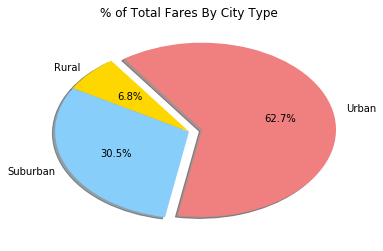

In [263]:
total_fares = combined_df.groupby(["type"])["fare"].sum()

Urban_fare= 39854.38
Suburban_fare = 19356.33
Rural_fare = 4327.93

fare_sum = (Rural_fare + Suburban_fare + Urban_fare )

rural_percent = (Rural_fare / fare_sum) *100
urban_percent = (Urban_fare / fare_sum)* 100
suburban_percent = (Suburban_fare / fare_sum)*100

fare_percents = [ suburban_percent , urban_percent, rural_percent ]
labels = [ "Suburban" , "Urban", "Rural" ]
colors= [ "lightskyblue" , "lightcoral", "gold"]
explode = (0,  0.10 , 0)

plt.title("% of Total Fares By City Type")
plt.pie(fare_percents, explode=explode, labels=labels ,colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.show
plt.savefig("./Resources/pyberimage2")
total_fares

In [250]:
# Total Rides by City Type

# Calculate Ride Percents

# Build Pie Chart

# Save Figure


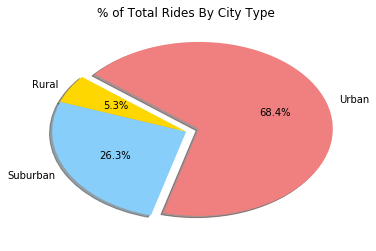

In [264]:
total_rides = combined_df.groupby(["type"])["ride_id"].count()
Rural_rides = 125
Suburban_rides = 625
Urban_rides = 1625

sum_rides= (Rural_rides + Suburban_rides + Urban_rides )

ruralrides_percent = (Rural_rides /sum_rides) *100
urbanrides_percent = (Urban_rides / sum_rides)* 100
suburbanrides_percent = (Suburban_rides /sum_rides)*100


percent_rides = [ suburbanrides_percent , urbanrides_percent, ruralrides_percent ]
labels = [ "Suburban" ,"Urban", "Rural" ]
colors= [ "lightskyblue" , "lightcoral", "gold" ]
explode = (0, 0.10, 0)

plt.title("% of Total Rides By City Type")
plt.pie(percent_rides, explode=explode, labels=labels , colors=colors, autopct="%1.1f%%",shadow=True,startangle=160)
plt.show
plt.savefig("./Resources/pyberimage3")

In [252]:
#Total Drivers by City Type

# Calculate Driver Percents

# Build Pie Charts

# Save Figure


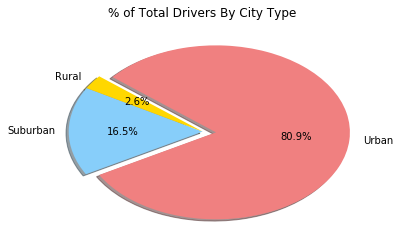

In [265]:
total_drivers = city_data.groupby(["type"]).sum()["driver_count"]
Rural_drivers = 78
Suburban_drivers = 490
Urban_drivers = 2405

sum_drivers= (Rural_drivers + Suburban_drivers + Urban_drivers )

ruraldrivers_percent = (Rural_drivers/sum_drivers) *100
urbandrivers_percent = (Urban_drivers / sum_drivers)* 100
suburbandrivers_percent = (Suburban_drivers /sum_drivers)*100


percent_drivers = [ suburbandrivers_percent , urbandrivers_percent, ruraldrivers_percent ]
labels = [ "Suburban" ,"Urban", "Rural" ]
colors= [ "lightskyblue" , "lightcoral", "gold" ]
explode = (0, 0.10, 0)

plt.title("% of Total Drivers By City Type")
plt.pie(percent_drivers,explode=explode, labels=labels ,colors=colors,autopct="%1.1f%%", shadow=True, startangle=150)
plt.show
plt.savefig("./Resources/pyberimage3")
